In [1]:
import numpy as np
import librosa
import soundfile as sf
import matplotlib.pyplot as plt

In [54]:
# Load the audio file
def audio_graph_plot(file_path):
    y, sr = librosa.load(file_path,sr=None) 
    # Takes the file path and Sampling Rate(sr), default sr=22050 and returns y(np.array of amplitude) , sr) 
#     print("Samples:",y)
#     print("Total Samples:",len(y))
#     print("Sampling rate:",sr)
    # Plot the waveform
    plt.figure(figsize=(14, 5))
    librosa.display.waveshow(y, sr=sr) # displays waveform in time domain
    plt.title('Audio')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

    # Plot the spectrogram
    plt.figure(figsize=(14, 5))
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    '''
    librosa.stft(y): Computes the Short-Time Fourier Transform of the audio signal,
    resulting in a complex-valued matrix representing the frequency content over time.

    np.abs(librosa.stft(y)): Converts the complex STFT matrix to a real-valued magnitude (amplitude) spectrum, 
    representing the strength of each frequency component over time.

    librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max): Converts the amplitude spectrum to a decibel (dB) scale using the maximum value as the reference, 
    normalizing the data and making it more suitable for visualization. 20log10(mag/ref)
    '''
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log') # Spectrogram Representation
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.show()
#     return y


(78336,)
Original Audio


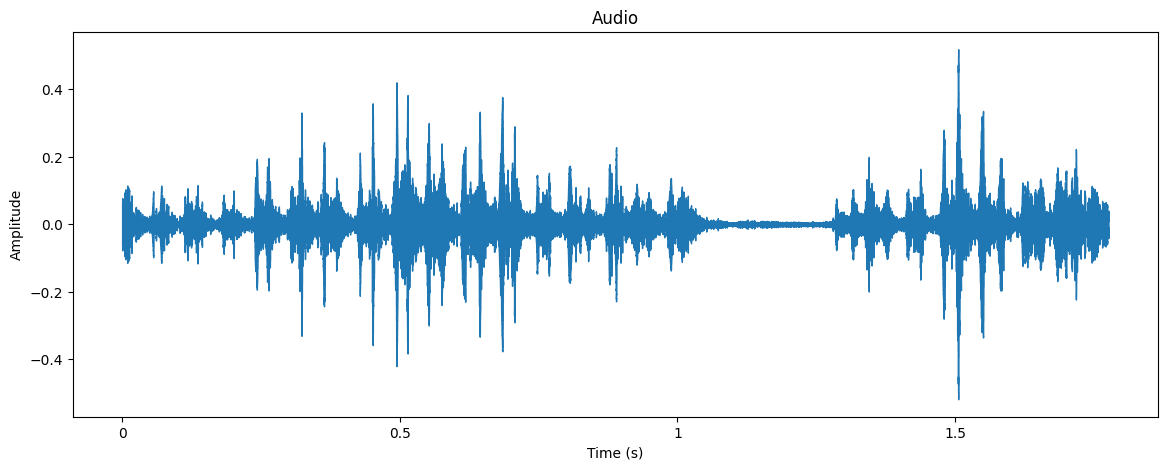

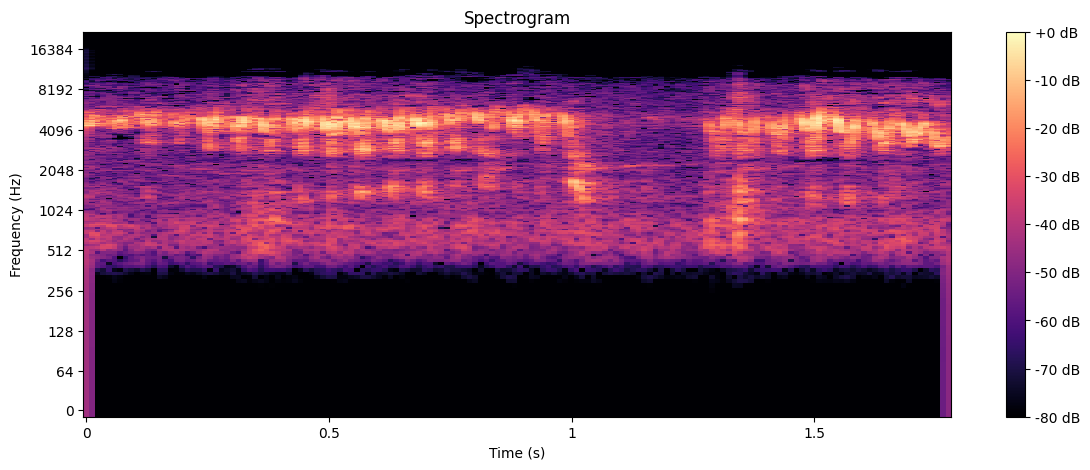

(78336,)
Augmented Audio


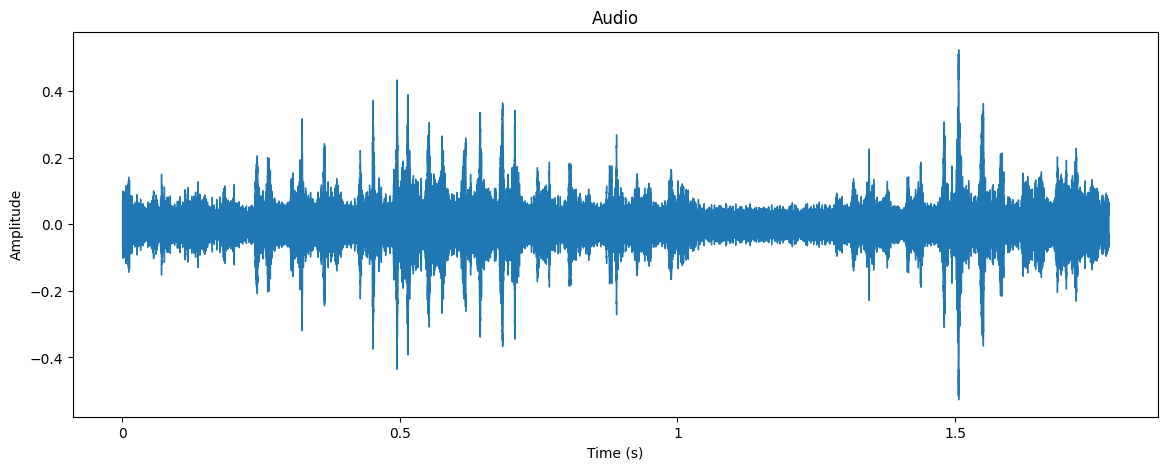

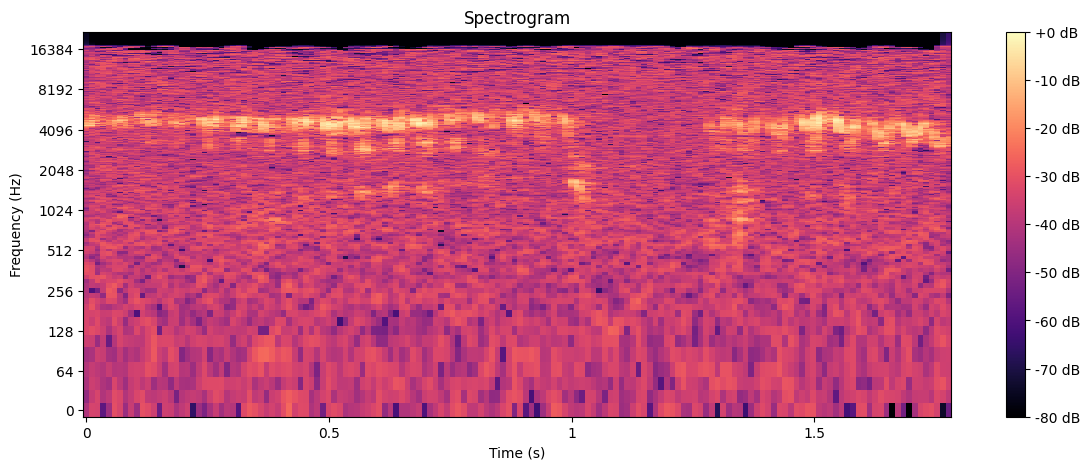

In [59]:

# Audio File
audio_path = 'cleaned_audio_librosa.mp3'
x, sr = librosa.load(audio_path, sr=None)
print(x.shape)
# Ploting original audio
print("Original Audio")
audio_graph_plot('cleaned_audio_librosa.mp3')

# Gaussian noise
mu = 0
sigma = 0.02
n = np.random.normal(mu, sigma, x.size)

# Augmented audio data
x_aug = x + n

print(x_aug.shape)
# Save the file
sf.write('new.mp3', x_aug, sr)
print("Augmented Audio")

# Ploting augmented audio
audio_graph_plot('new.mp3')

In [46]:
n

array([-0.00322862,  0.01427345,  0.00664524, ...,  0.0214893 ,
        0.00471012, -0.00070584])

In [47]:
n.shape

(78336,)

In [63]:
# Data Augmentation

def plotSignals(signal, white_noise_signal,
                time_stretched_signal,
                pitch_scaled_signal,
                plority_inverted_signal,
                random_gain_signal,
                sr):

  fig, ax = plt.subplots(nrows=6, figsize=(12, 15))

  librosa.display.waveshow(signal, sr=sr, ax=ax[0])
  ax[0].set_title("Original signal")

  librosa.display.waveshow(white_noise_signal, sr=sr, ax=ax[1])
  ax[1].set_title("Signal with white noise")

  librosa.display.waveshow(time_stretched_signal, sr=sr, ax=ax[2])
  ax[2].set_title("Time stretched signal")

  librosa.display.waveshow(pitch_scaled_signal, sr=sr, ax=ax[3])
  ax[3].set_title("Pitch scaled signal")

  librosa.display.waveshow(plority_inverted_signal, sr=sr, ax=ax[4])
  ax[4].set_title("Polarity Inverted Signal")

  librosa.display.waveshow(random_gain_signal, sr=sr, ax=ax[5])
  ax[5].set_title("Signal with random gain")


  plt.tight_layout()
  plt.show()
     
# White Noise

def addWhiteNoise(signal, noise_factor):
  noise = np.random.normal(0, signal.std(), signal.size)
  augmented_signal = signal + noise * noise_factor

  return augmented_signal
     
# Time Stretch


def addTimeStretch(signal, stretch_rate):
  return librosa.effects.time_stretch(signal, rate=stretch_rate)
     
# Pitch Scale


def pitchScale(signal, sr, num_semitones):
    return librosa.effects.pitch_shift(y=signal, sr=sr, n_steps=num_semitones)
     
# Polarity Inversion


def invertPolarity(signal):
  return signal * -1
     
# Random Gain

def randomGain(signal, min_gain_factor, max_gain_factor):
  gain_factor = np.random.uniform(min_gain_factor, max_gain_factor)
  return signal * gain_factor
     

In [64]:

def plotSignals(signal, white_noise_signal,
                time_stretched_signal,
                pitch_scaled_signal,
                plority_inverted_signal,
                random_gain_signal,
                sr):

  fig, ax = plt.subplots(nrows=6, figsize=(12, 15))

  librosa.display.waveshow(signal, sr=sr, ax=ax[0])
  ax[0].set_title("Original signal")

  librosa.display.waveshow(white_noise_signal, sr=sr, ax=ax[1])
  ax[1].set_title("Signal with white noise")

  librosa.display.waveshow(time_stretched_signal, sr=sr, ax=ax[2])
  ax[2].set_title("Time stretched signal")

  librosa.display.waveshow(pitch_scaled_signal, sr=sr, ax=ax[3])
  ax[3].set_title("Pitch scaled signal")

  librosa.display.waveshow(plority_inverted_signal, sr=sr, ax=ax[4])
  ax[4].set_title("Polarity Inverted Signal")

  librosa.display.waveshow(random_gain_signal, sr=sr, ax=ax[5])
  ax[5].set_title("Signal with random gain")


  plt.tight_layout()
  plt.show()

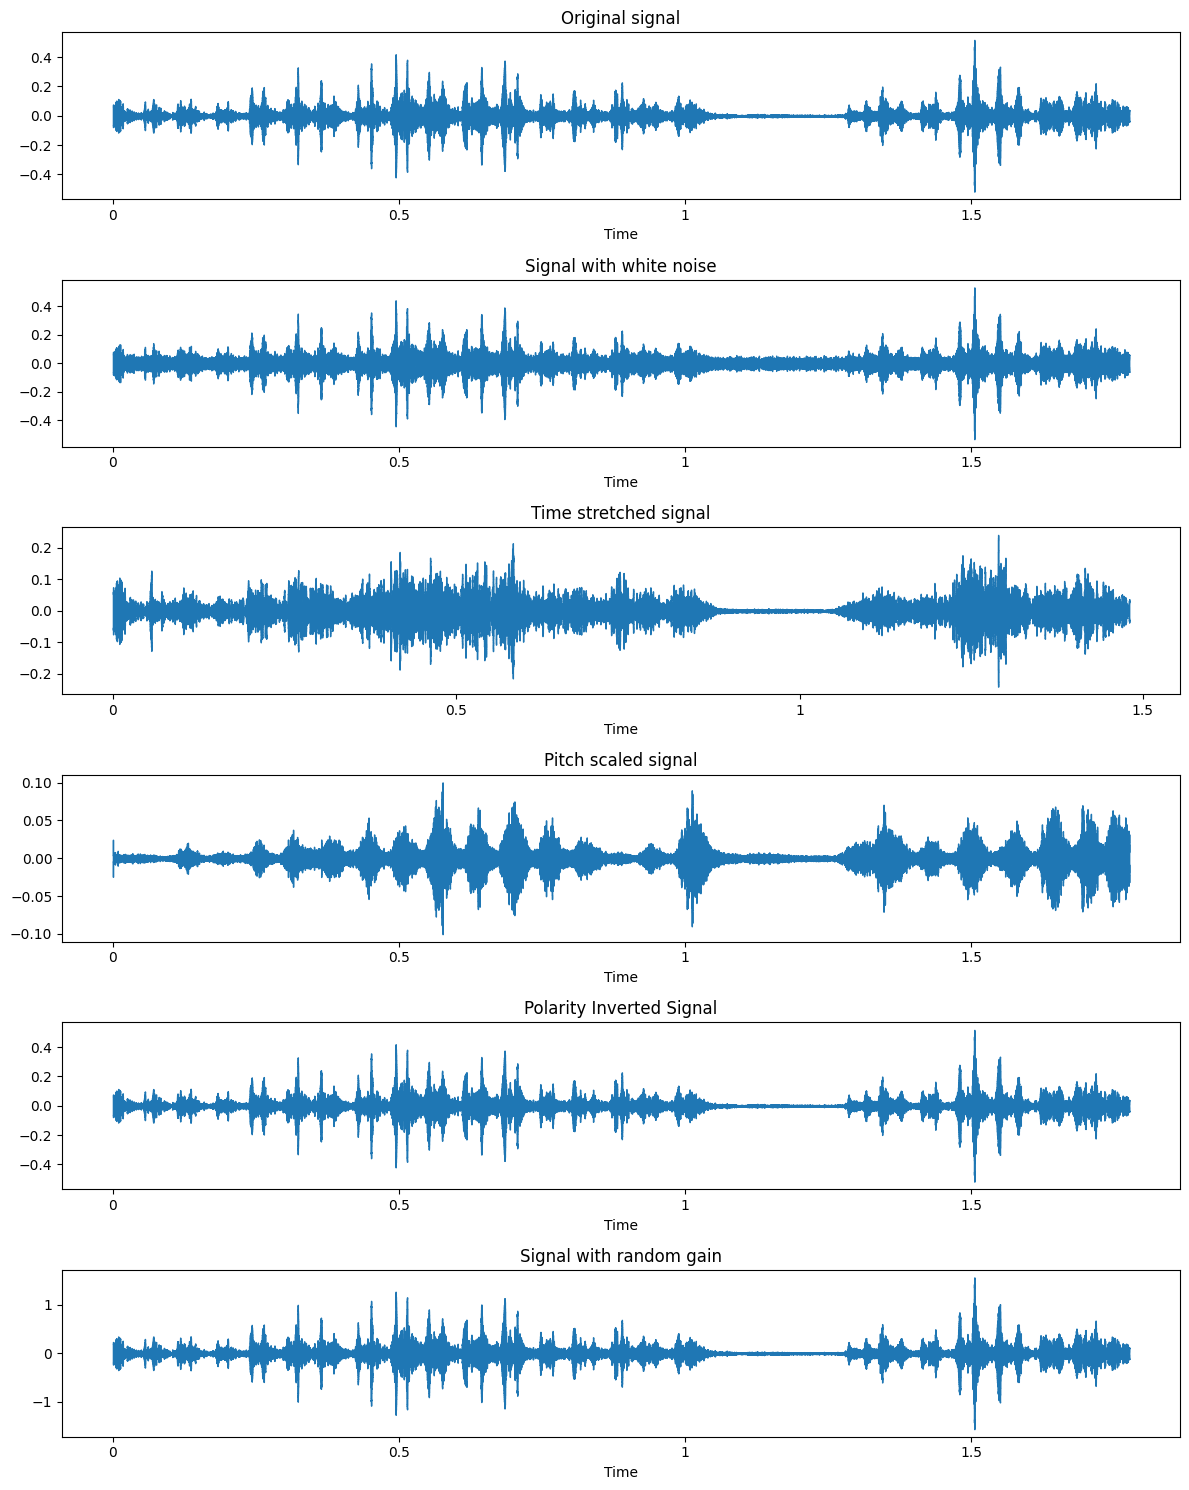

In [65]:
file_path = "cleaned_audio_librosa.mp3"

signal, sr = librosa.load(file_path,sr=None)

white_noise_signal = addWhiteNoise(signal, 0.3)
sf.write("white_noise_signal.wav", white_noise_signal, sr)

time_stretched_signal = addTimeStretch(signal, 1.2)
sf.write("time_stretched_signal.wav", time_stretched_signal, sr)

pitch_scaled_signal = pitchScale(signal, sr, 30)
sf.write("pitch_scaled_signal.wav", pitch_scaled_signal, sr)

polarity_inverted_signal = invertPolarity(signal)
sf.write("polarity_inverted_signal.wav", polarity_inverted_signal, sr)

random_gain_signal = randomGain(signal, 3, 8)
sf.write("random_gain_signal.wav", random_gain_signal, sr)

plotSignals(signal,
            white_noise_signal,
            time_stretched_signal,
            pitch_scaled_signal,
            polarity_inverted_signal,
            random_gain_signal, sr)

In [66]:
signal.shape

(78336,)

In [67]:
import IPython
IPython.display.Audio("cleaned_audio_librosa.mp3")

In [68]:
IPython.display.Audio("white_noise_signal.wav")

In [69]:
IPython.display.Audio("new.mp3")

In [70]:
IPython.display.Audio("random_gain_signal.wav")

In [71]:
IPython.display.Audio("polarity_inverted_signal.wav")

In [72]:
IPython.display.Audio("pitch_scaled_signal.wav")

In [73]:
IPython.display.Audio("time_stretched_signal.wav")